* requirement is that you have the most current version of the QSB git repositories cloned

> git clone https://git.ipp-hgw.mpg.de/pih/QSB_Bolometry
> -------------------------------------------------------

* given that this worked, you will be able to compile a automatic peak search database

In [2]:
import os, sys, importlib
import numpy as np

# need to change directories
libdir = '//share.ipp-hgw.mpg.de//documents//pih//Documents//git//QSB_Bolometry//'
root = '//share.ipp-hgw.mpg.de//documents//pih//Documents//git//QSB_Bolometry//libprad//'

os.chdir(root)
print('\\\ working dir:', os.getcwd())

sys.path.append(libdir + 'files/customs/')
sys.path.append(libdir + 'libprad/')
sys.path.append(libdir + 'libprad/libwebapi/')
sys.path.append(libdir + 'libprad/liboutput/')
sys.path.append(libdir + 'libprad/libtraining/')
sys.path.append(libdir + 'libprad/libradcalc/')
sys.path.append(libdir + 'libprad/libscaling/')
print('\\\ loaded QSB lib')

import importlib
import webapi_access as api
import plot_funcs as pf
import methane_session_scaling as mss

\\ working dir: \\share.ipp-hgw.mpg.de\documents\pih\Documents\git\QSB_Bolometry\libprad
\\ loaded QSB lib


In [17]:
importlib.reload(mss)
importlib.reload(pf)

peak_width = 0.150  # 150ms filter for peak search
xpid = 32
date = '20181010'

In [18]:
import json
with open(
        '//share.ipp-hgw.mpg.de/documents/pih/Documents/git/' + 
        'QSB_Bolometry/results/PEAKS/data/database_150ms.json', 'r') as f:
    database = json.load(f)
f.close()

In [19]:
database.keys()

dict_keys(['20180920', '20181010', '20171011', '20180718', '20180719', '20180724', '20180725', '20180726', '20180731', '20180801', '20180807', '20180808', '20180809', '20180814', '20180821', '20180822', '20180823', '20180906', '20180911', '20180912', '20180918', '20180919', '20180925', '20180927', '20181002', '20181004', '20181009', '20181011', '20181016', '20181017', '20181018'])

In [ ]:
importlib.reload(mss)
importlib.reload(api)
importlib.reload(pf)

for date in foo.keys():
    for xpid in foo[date]['ids']:
        print('\\\ ' + date + '.' + str(xpid).zfill(3))
        database = mss.xp_stat(
            date=date,
            id=xpid,
            solo=False,
            peak_width=peak_width)
        break
    break

In [5]:
importlib.reload(mss)
# individually for one tau
database75, download75 = mss.xp_stat(
    date='20181010',
    id=32,
    solo=True,
    peak_width=0.0750)

peaks75 = mss.match_peaks(
    data=database75, solo=True)

>> Downloading from: ['PradHBCm', 'PradVBC', 'T_e ECE core', 'T_e ECE out', 'n_e lint', 'W_dia', 'ECRH', 'Main valve BG011', 'Main valve BG031', 'QSQ Feedback AEH51', 'QSQ Feedback AEH30']
>> loaded ne/Te QTB volumes: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 

\\ i: 0 20181010.032


\\share.ipp-hgw.mpg.de\documents\pih\Documents\git\QSB_Bolometry\libprad\libscaling\methane_session_scaling.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not d['info'][i][l0][l1][l2] == []:


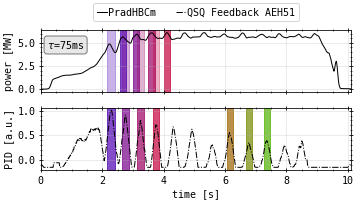

In [12]:
tau = 75  # 150 # 250
download = download75
database = database75
peaks = peaks75

import matplotlib.pyplot as p
from matplotlib.pyplot import cm
fig, axes = p.subplots(2, 1, sharex=True)
C = cm.brg(np.linspace(
    0, 1, len(peaks['20181010.032']['PradHBCm']['time'])))
f = [1.e6, np.max(download['QSQ Feedback AEH51']['values'])]

ls = ['-', '-.']
linec = ['k', 'k']
lines = []

for k, key in enumerate(
        ['PradHBCm', 'QSQ Feedback AEH51']):
    L, = axes[k].plot(
        download[key]['dimensions'],
        download[key]['values'] / f [k],
        c=linec[k], ls=ls[k], label=key)
    lines.append(L)

    if k == 0:
        for h, t in enumerate(peaks['20181010.032']['PradHBCm']['time']):

            j = np.where(database['20181010'][
                'peaks'][0]['PradHBCm']['time'] == t)[0][0]
            a, b = \
                database['20181010']['peaks'][0][key]['start_time'][j], \
                database['20181010']['peaks'][0][key]['stop_time'][j]

            if (h > 0) and (.1 <= (b - a) <= 0.75):
                t2 = peaks['20181010.032']['PradHBCm']['source']['time'][j]
                i = np.where(database['20181010']['peaks'][0][
                    'QSQ Feedback AEH51']['time'] == t2)[0][0]

                c, d = \
                    database['20181010']['peaks'][0]['QSQ Feedback AEH51'][
                        'start_time'][i], database['20181010']['peaks'][0][
                        'QSQ Feedback AEH51']['stop_time'][i]
                if ((d - c) <= 0.75):
                    axes[1].fill_between(
                        [d, c], .0, 1., color=C[j], alpha=0.7,
                        transform=axes[1].get_xaxis_transform())

                    if (c < a):
                        axes[0].fill_between(
                            [d, c], .0, 1., color=C[j], alpha=0.3,
                            transform=axes[0].get_xaxis_transform())

                        # axes[k].axvline(t)
                        axes[0].fill_between(
                            [a, b], .0, 1., color=C[j], alpha=0.7,
                            transform=axes[0].get_xaxis_transform())

for ax in axes:
    ax.set_xlim(
        np.min(download[key]['dimensions']),
        np.max(download[key]['dimensions']))
axes[0].set_ylabel('power [MW]')
axes[1].set_ylabel('PID [a.u.]')
axes[1].set_xlabel('time [s]')
axes[0].legend(
    lines, [l.get_label() for l in lines],
    loc='upper center', bbox_to_anchor=(.5, 1.5),
    ncol=2, fancybox=True, shadow=False,
    handletextpad=0.1, labelspacing=0.2, handlelength=1.)
    
# build box
prop = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
# place a text box in upper left in axes coords
axes[0].text(
    0.02, 0.85, '$\\tau$=' + str(tau) + 'ms', transform=axes[0].transAxes,
    verticalalignment='top', bbox=prop)

fig.set_size_inches(5., 3.)
fig.savefig(
    'peak_mathching_' + str(tau) + 'ms_example.pdf',
    bbox_inches='tight', dpi=169.)

In [14]:
importlib.reload(mss)
params = mss.plasma_param_at_peaks(
    res=database,
    dbfile='../results/PEAKS/data/database_150ms.json',
    peak_width=0.15,
    solo=False)

UnboundLocalError: local variable 'key' referenced before assignment

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import mClass

filtered_peaks = mClass.dict_transf(filtered_peaks, to_list=False)
def regress_lin(x, y):
        def lin_func(x, a):  # , b):
            return (a * x)  #  + b)
        [a], res = curve_fit(
            lin_func, x, y,
            p0=(1.), absolute_sigma=None,
            check_finite=True, method='lm')
        print(np.sqrt(np.diag(res)))
        return (a)

for cam in ['HBCm', 'VBC']:
    y = (filtered_peaks['Prad' + cam]['peak'] - filtered_peaks['Prad' + cam]['base']) / 1.e6
    x = np.sqrt(2. * np.pi) * filtered_peaks['Prad' + cam]['source']['width'] * (
        filtered_peaks['Prad' + cam]['source']['peak'] - filtered_peaks['Prad' + cam]['source']['base'])

    print(regress_lin(x, y))

In [ ]:
from scipy.optimize import curve_fit
import numpy as np

def regress_lin(x, y, z):
        def lin_func(J, a, b, c):
            k, h = J
            return (a * k**b + h**c)
        [a, b, c], res = curve_fit(
            lin_func, (x, y), z,
            p0=(1., 1., 1.), absolute_sigma=None,
            check_finite=True, method='lm')
        return (a, b, c)

res = {}
def try_regress(
            x, y, z, ranges, xlabel, ylabel):
        try:
            nn = np.where(
                (x > ranges[0, 0]) & (x < ranges[0, 1]) &
                (y > ranges[1, 0]) & (y < ranges[1, 1]) &
                (z > ranges[2, 0]) & (z < ranges[2, 1]))
            X, Y, Z = x[nn], y[nn], z[nn]

            print(X, Y, Z)

            a, b, c = regress_lin(X, Y, Z)

        except Exception:
            exc_type, exc_obj, exc_tb = sys.exc_info()
            fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
            print(xlabel, np.shape(X), np.shape(Y), np.shape(Z))
            print('\\\ failed regression:', exc_type, fname, exc_tb.tb_lineno)
            return

        res['x'].append(X)
        res['y'].append(Y)
        res['z'].append(Z)

        res['a'].append(a)
        res['b'].append(b)
        res['c'].append(c)

        res['xlabel'].append(xlabel)
        res['ylabel'].append(ylabel)
        return

data = filtered_peaks['PradHBCm']
params = data['params']
ecrh, ne = params['ECRH'], params['n_e lint']
te_out, te_core = params['T_e ECE out'], params['T_e ECE core']

try_regress(
    ecrh['value'] / 1.e3,  # x
    ne['value'] / 1.e19,  # y
    data['peak'] / 1.e6,  # z
    np.array([[0.5, 10.], [0.1, 1.e2], [0.25, 6.]]),
    '', '')

In [16]:
importlib.reload(mss)
params = mss.plasma_param_at_peaks(
    res=database,
    solo=False)

TypeError: Object of type ndarray is not JSON serializable

In [ ]:
importlib.reload(mss)
importlib.reload(pf)
peak_fit = mss.regress_peak_params(
    data=params['PradHBCm'])

In [ ]:
importlib.reload(mss)
frad_filt_params = mss.diag_plasma_peak_params(
    data=params,
    solo=True,
    frad_filt=0.3)

In [ ]:
# gets peaks, also plots hits on traces to QSB_Bolometry/results/PEAKS/
# if peak_width >= 100ms
importlib.reload(mss)
data = mss.xp_stat(
    date=date,
    id=xpid,
    peak_width=peak_width,
    debug=False)

In [20]:
# now match peaks with source terms, i.e. QSQ valves or main gas inlet
importlib.reload(mss)
peaks = mss.match_peaks(
    db_file='../results/PEAKS/data/database_' + str(int(peak_width * 1e3)) + 'ms.json',
    data=None,
    debug=False)

\\ i: 0 20180920.002
\\ i: 1 20180920.003


\\share.ipp-hgw.mpg.de\documents\pih\Documents\git\QSB_Bolometry\libprad\libscaling\methane_session_scaling.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not d['info'][i][l0][l1][l2] == []:


\\ i: 2 20180920.004
\\ i: 3 20180920.005
\\ i: 4 20180920.006
\\ i: 5 20180920.007
\\ i: 6 20180920.008
\\ i: 7 20180920.009
\\ i: 8 20180920.010
\\ i: 9 20180920.011
\\ i: 10 20180920.012
\\ i: 11 20180920.013
\\ i: 12 20180920.014
\\ i: 13 20180920.015
\\ i: 14 20180920.016
\\ i: 15 20180920.017
\\ i: 16 20180920.018
\\ i: 17 20180920.019
\\ i: 18 20180920.020
\\ i: 19 20180920.021
\\ i: 20 20180920.022
\\ i: 21 20180920.023
\\ i: 22 20180920.024
\\ i: 23 20180920.025
\\ i: 24 20180920.026
\\ i: 25 20180920.027
\\ i: 26 20180920.028
\\ i: 27 20180920.029
\\ i: 28 20180920.030
\\ i: 29 20180920.031
\\ i: 30 20180920.032
\\ i: 31 20180920.033
\\ i: 32 20180920.034
\\ i: 33 20180920.035
\\ i: 34 20180920.036
\\ i: 35 20180920.037
\\ i: 36 20180920.038
\\ i: 37 20180920.039
\\ i: 38 20180920.040
\\ i: 39 20180920.041
\\ i: 40 20180920.042
\\ i: 41 20180920.043
\\ i: 42 20180920.044
\\ i: 43 20180920.045
\\ i: 44 20180920.046
\\ i: 45 20180920.047
\\ i: 46 20180920.048
\\ i: 47 20180920.

In [33]:
# filter the results for source key and value in that key (example below)
# also plots them
importlib.reload(mss)
importlib.reload(pf)
filtered = mss.diag_peaks(
    file='../results/PEAKS/data/peaks_' + str(int(peak_width * 1e3)) + 'ms.json',
    paramfile='../results/PEAKS/data/peak_params_' + str(int(peak_width * 1e3)) + 'ms.json',
    filter_key='gas',  # None,
    filter_value='H2',  # None,
    debug=False)

In [36]:
# scatter plot with plasma parameters as zaxis
importlib.reload(pf)
importlib.reload(mss)
filtered_peaks = mss.scatter_peaks(
    file='../results/PEAKS/data/peaks_' + str(int(peak_width * 1e3)) + 'ms.json',
    paramfile='../results/PEAKS/data/peak_params_' + str(int(peak_width * 1e3)) + 'ms.json',
    filter_key='gas',
    filter_value='He',
    debug=False)

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
def regress_lin(x, y):
        def lin_func(x, a, b):
            return (a * x + b)
        [a, b], pcov = curve_fit(
            lin_func, x, y,
            p0=(1., 1.), absolute_sigma=None,
            check_finite=True, method='lm')
        
        print(a, b, np.sqrt(np.diag(pcov)))
        return (a, b)

for cam in ['HBCm', 'VBC']:
    y = (filtered_peaks['Prad' + cam]['peak'] - filtered_peaks['Prad' + cam]['base']) / 1.e6
    x = np.sqrt(2. * np.pi) * filtered_peaks['Prad' + cam]['source']['width'] * (
        filtered_peaks['Prad' + cam]['source']['peak'] - filtered_peaks['Prad' + cam]['source']['base'])
    a, b = regress_lin(x, y)

In [ ]:
# very expensive, takes forever
# looking up every plasma parameter at a peak
# position found before in data
importlib.reload(mss)
plasma_params = mss.plasma_param_at_peaks(
    dbfile='../results/PEAKS/data/database_' + str(int(peak_width * 1e3)) + 'ms.json')

In [ ]:
# plot found peaks with params
importlib.reload(mss)
importlib.reload(pf)
filtered_peak_params = mss.diag_plasma_peak_params(
    dbfile='../results/PEAKS/data/peak_params_' + str(int(peak_width * 1e3)) + 'ms.json',
    data=None,
    solo=False,
    frad_filt=0.75)

In [ ]:
# regress filtered peak params database
importlib.reload(mss)
importlib.reload(pf)
regress = mss.regress_peak_params(
    data=filtered_peak_params['PradHBCm'])

In [ ]:
# regress found peaks based on a*x^b*y^c
importlib.reload(mss)
regress = mss.regress_peak_params(
    dbfile='../results/PEAKS/data/peak_params_' + str(int(peak_width * 1e3)) + 'ms.json')

In [ ]:
# data is the shape of
# { date: {
#     ids: [...],
#     info: [
#         {Fuelling: {
#             Gas1: {type: ..., duration: ..., mode: ...},
#             ...}
#         }, ...
#     ],
#     comments: [...,],
#     peaks: [
#         {
#             ECRH: {
#                 index: ...
#                 time:
#                 start_index:
#                 stop_index:
#                 start_time:
#                 stop_time:
#                 width_index:
#                 width_time:
#                 start_val:
#                 stop_val:  
#                 peak_val: ...
#             }, PradHBCm: {
#                 ... }, ...
#             }, {ECRH: {...}, ...
#         }
#     ]
# }

# peaks is the shape of
# { xpid: {
#     PradHBCm: {
#     time: ...,
#     width:
#     distance:
#     base
#     peak
#     source:{
#         type:
#         gas:
#         time:
#         width: ...}
#     }, PradVBC : {...}, ...
#   next_xpid: {
#    ...}
# }

# filtered looks like
# {
#     PradHBCm:{
#         time:
#         width:
#         distance:
#         base:
#         peak:
#         source: {
#             type:...,
#             gas:
#             time:
#             width:
#             base:
#             peak: ...,
#         }
#     },
#     PradVBC: {...}, ...
# }

# plasma params looks like       
# {     
#     ECRH: {     
#         xpid: ...,      
#         time:       
#         start_time       
#         stop_time       
#         start_val       
#         peak_val        
#         params: {       
#             ECRH: {     
#                 start_val: ...      
#                 peak_val:       
#            }       
#         }       
#     },      
#     PradHBCm: {...}     
# }

# plasma param regression looks like
# {       
#     prad=a*ne^b+ecrh^c: {
#            'data': (ne, ecrh, prad),
#            'params': (a, b, c)},
#     ...
# }